In [1]:
import tensorflow.keras.utils as utils #분류분석시 원핫인코딩
from tensorflow.keras.models import Sequential # 모델 생성시
from tensorflow.keras.layers import Dense, Activation
import numpy as np

# 1. 데이터셋 준비

In [3]:
# 학습데이터(훈련데이터), 검증 데이터, 테스트데이터

In [2]:
# 학습 데이터 (훈련데이터)
X_train = np.array([1,2,3,4,5,6,7,8,9]*10)
Y_train = np.array([2,4,6,8,10,12,14,16,18]*10)

# 검증데이터, 테스트데이터.
X_val = np.array([1,2,3,4,5,6,7,8,9])
Y_val = np.array([2,4,6,8,10,12,14,16,18])

In [4]:
Y_val

array([ 2,  4,  6,  8, 10, 12, 14, 16, 18])

In [5]:
# 분류분석을 하기위해 target데이터를 라벨링 전환 (원 핫 인코딩) -> 컴퓨터한테 알려주는것.
Y_train = utils.to_categorical(Y_train, 19) 
Y_val = utils.to_categorical(Y_val, 19)

In [6]:
Y_val

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1.]], dtype=float32)

# 2. 모델 구성하기

In [7]:
model = Sequential()
# 38개의 출력.  input_dim= 입력한 값들 갯수
model.add(Dense(units=38, input_dim=1, activation="sigmoid"))
model.add(Dense(units=64, activation="elu"))
model.add(Dense(units=32, activation="elu"))
model.add(Dense(units=19, activation="softmax")) #softmax -> 모든 출력결과의 합이 1. 

# 38 -> 64 ,... => 하는법 개발자가 하면서 조금씩 수정해봐야한다.

# 3. 모델 학습과정 설정

In [10]:
# accuracy 정확도.  loss가 줄어들면 정확도 상승.
model.compile(loss="categorical_crossentropy", optimizer="sgd",
              metrics=['accuracy']) 

# 4. 모델 학습시키기

In [11]:
# x 독립, y 종속,   batch_size= 가중치 조정.
hist = model.fit(X_train, Y_train, epochs=300, batch_size=10,
                 verbose=2, validation_data=(X_val, Y_val))

Epoch 1/300
9/9 - 1s - loss: 2.9608 - accuracy: 0.0111 - val_loss: 2.8608 - val_accuracy: 0.1111
Epoch 2/300
9/9 - 0s - loss: 2.8151 - accuracy: 0.1222 - val_loss: 2.7316 - val_accuracy: 0.2222
Epoch 3/300
9/9 - 0s - loss: 2.7026 - accuracy: 0.2111 - val_loss: 2.6284 - val_accuracy: 0.1111
Epoch 4/300
9/9 - 0s - loss: 2.5991 - accuracy: 0.1778 - val_loss: 2.5441 - val_accuracy: 0.2222
Epoch 5/300
9/9 - 0s - loss: 2.5261 - accuracy: 0.1333 - val_loss: 2.4745 - val_accuracy: 0.2222
Epoch 6/300
9/9 - 0s - loss: 2.4644 - accuracy: 0.1556 - val_loss: 2.4176 - val_accuracy: 0.2222
Epoch 7/300
9/9 - 0s - loss: 2.4159 - accuracy: 0.1333 - val_loss: 2.3696 - val_accuracy: 0.2222
Epoch 8/300
9/9 - 0s - loss: 2.3666 - accuracy: 0.1889 - val_loss: 2.3291 - val_accuracy: 0.2222
Epoch 9/300
9/9 - 0s - loss: 2.3301 - accuracy: 0.1889 - val_loss: 2.2951 - val_accuracy: 0.2222
Epoch 10/300
9/9 - 0s - loss: 2.2998 - accuracy: 0.2333 - val_loss: 2.2658 - val_accuracy: 0.1111
Epoch 11/300
9/9 - 0s - loss:

Epoch 85/300
9/9 - 0s - loss: 1.3523 - accuracy: 0.5667 - val_loss: 1.3206 - val_accuracy: 0.7778
Epoch 86/300
9/9 - 0s - loss: 1.3401 - accuracy: 0.6000 - val_loss: 1.3138 - val_accuracy: 0.5556
Epoch 87/300
9/9 - 0s - loss: 1.3332 - accuracy: 0.5556 - val_loss: 1.3049 - val_accuracy: 0.6667
Epoch 88/300
9/9 - 0s - loss: 1.3197 - accuracy: 0.6333 - val_loss: 1.2960 - val_accuracy: 0.6667
Epoch 89/300
9/9 - 0s - loss: 1.3227 - accuracy: 0.4444 - val_loss: 1.2907 - val_accuracy: 0.7778
Epoch 90/300
9/9 - 0s - loss: 1.3048 - accuracy: 0.6778 - val_loss: 1.2800 - val_accuracy: 0.7778
Epoch 91/300
9/9 - 0s - loss: 1.3073 - accuracy: 0.5778 - val_loss: 1.2734 - val_accuracy: 0.5556
Epoch 92/300
9/9 - 0s - loss: 1.2916 - accuracy: 0.5667 - val_loss: 1.2656 - val_accuracy: 0.6667
Epoch 93/300
9/9 - 0s - loss: 1.2877 - accuracy: 0.6778 - val_loss: 1.2596 - val_accuracy: 0.6667
Epoch 94/300
9/9 - 0s - loss: 1.2807 - accuracy: 0.5667 - val_loss: 1.2509 - val_accuracy: 0.6667
Epoch 95/300
9/9 - 0

Epoch 168/300
9/9 - 0s - loss: 0.8758 - accuracy: 0.8333 - val_loss: 0.8435 - val_accuracy: 0.8889
Epoch 169/300
9/9 - 0s - loss: 0.8880 - accuracy: 0.8333 - val_loss: 0.8377 - val_accuracy: 1.0000
Epoch 170/300
9/9 - 0s - loss: 0.8597 - accuracy: 0.8556 - val_loss: 0.8366 - val_accuracy: 0.8889
Epoch 171/300
9/9 - 0s - loss: 0.8561 - accuracy: 0.8333 - val_loss: 0.8352 - val_accuracy: 0.8889
Epoch 172/300
9/9 - 0s - loss: 0.8639 - accuracy: 0.8778 - val_loss: 0.8253 - val_accuracy: 0.8889
Epoch 173/300
9/9 - 0s - loss: 0.8479 - accuracy: 0.9111 - val_loss: 0.8235 - val_accuracy: 0.8889
Epoch 174/300
9/9 - 0s - loss: 0.8577 - accuracy: 0.8333 - val_loss: 0.8258 - val_accuracy: 0.7778
Epoch 175/300
9/9 - 0s - loss: 0.8489 - accuracy: 0.8222 - val_loss: 0.8162 - val_accuracy: 0.8889
Epoch 176/300
9/9 - 0s - loss: 0.8330 - accuracy: 0.8333 - val_loss: 0.8164 - val_accuracy: 0.8889
Epoch 177/300
9/9 - 0s - loss: 0.8512 - accuracy: 0.7778 - val_loss: 0.8082 - val_accuracy: 1.0000
Epoch 178/

Epoch 251/300
9/9 - 0s - loss: 0.5837 - accuracy: 0.9333 - val_loss: 0.5554 - val_accuracy: 0.8889
Epoch 252/300
9/9 - 0s - loss: 0.5922 - accuracy: 0.8778 - val_loss: 0.5594 - val_accuracy: 0.8889
Epoch 253/300
9/9 - 0s - loss: 0.5751 - accuracy: 0.8778 - val_loss: 0.6290 - val_accuracy: 0.7778
Epoch 254/300
9/9 - 0s - loss: 0.5765 - accuracy: 0.9222 - val_loss: 0.5531 - val_accuracy: 0.8889
Epoch 255/300
9/9 - 0s - loss: 0.5739 - accuracy: 0.9444 - val_loss: 0.5541 - val_accuracy: 0.8889
Epoch 256/300
9/9 - 0s - loss: 0.5960 - accuracy: 0.8667 - val_loss: 0.5465 - val_accuracy: 0.8889
Epoch 257/300
9/9 - 0s - loss: 0.5644 - accuracy: 0.9222 - val_loss: 0.5402 - val_accuracy: 0.8889
Epoch 258/300
9/9 - 0s - loss: 0.5690 - accuracy: 0.9444 - val_loss: 0.5317 - val_accuracy: 1.0000
Epoch 259/300
9/9 - 0s - loss: 0.5532 - accuracy: 0.9444 - val_loss: 0.5362 - val_accuracy: 1.0000
Epoch 260/300
9/9 - 0s - loss: 0.5547 - accuracy: 0.9667 - val_loss: 0.5311 - val_accuracy: 1.0000
Epoch 261/

In [12]:
hist.history

{'loss': [2.960838556289673,
  2.8151299953460693,
  2.7025904655456543,
  2.5990524291992188,
  2.5261380672454834,
  2.4644253253936768,
  2.4159388542175293,
  2.366641044616699,
  2.3300676345825195,
  2.299795150756836,
  2.270425796508789,
  2.2468464374542236,
  2.2251641750335693,
  2.209355354309082,
  2.190664768218994,
  2.1731719970703125,
  2.1646430492401123,
  2.150707244873047,
  2.1323258876800537,
  2.1216824054718018,
  2.0996856689453125,
  2.096813201904297,
  2.081096649169922,
  2.0651986598968506,
  2.0590522289276123,
  2.0457239151000977,
  2.0355265140533447,
  2.0255467891693115,
  2.0065512657165527,
  1.9935739040374756,
  1.9810426235198975,
  1.9757773876190186,
  1.9593621492385864,
  1.9448246955871582,
  1.9380890130996704,
  1.915512204170227,
  1.90419340133667,
  1.8929705619812012,
  1.8732128143310547,
  1.876835823059082,
  1.8526514768600464,
  1.8417184352874756,
  1.8232048749923706,
  1.8150163888931274,
  1.81040620803833,
  1.7816406488418

In [14]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

# 5. 모델 학습과정 살펴보기(hist, 평가)

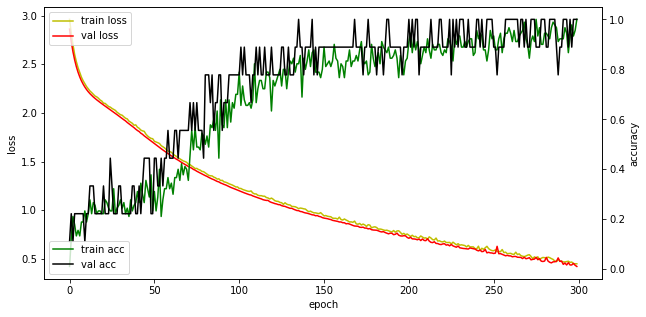

In [19]:
# 모델의 학습과정을 표시하기.
import matplotlib.pyplot as plt
fig, loss_ax = plt.subplots(figsize=(10,5))
loss_ax.plot(hist.history['loss'], 'y',label="train loss")
loss_ax.plot(hist.history['val_loss'], 'r', label="val loss")

acc_ax = loss_ax.twinx() # loss_ax와 x축을 공유하는 acc_ax 생성.
acc_ax.plot(hist.history["accuracy"], 'g', label="train acc")
acc_ax.plot(hist.history["val_accuracy"], 'k', label="val acc")

loss_ax.set_xlabel("epoch")
loss_ax.set_ylabel("loss")
acc_ax.set_ylabel("accuracy")
loss_ax.legend(loc="upper left")
acc_ax.legend(loc="lower left")
plt.show()

In [20]:
# 모델 평가

score = model.evaluate(X_val, Y_val, batch_size=1)
score # [0.4222785234451294, 1.0] -> loss

9/9 [==============================] - 0s 1ms/step - loss: 0.4223 - accuracy: 1.0000


[0.4222785234451294, 1.0]

In [21]:
print('loss : ', score[0])
print('accuracy : ', score[1]) # 정확도 100%

loss :  0.4222785234451294
accuracy :  1.0


# 6. 모델을 이용해서 예측하기

In [23]:
model.predict_classes(np.array([2]))

C:\Users\tjoeun\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([4], dtype=int64)

In [24]:
model.predict(np.array([2])) # 대신 바로 윗 코드를 사용.

array([[2.19030133e-12, 6.72930418e-12, 6.90392852e-02, 4.52600891e-12,
        8.45189154e-01, 3.20673479e-12, 8.52295458e-02, 5.54011936e-15,
        5.40422101e-04, 4.79261033e-14, 1.48628828e-06, 1.48882520e-13,
        7.05092304e-11, 2.31492749e-13, 8.87415074e-15, 1.06270465e-14,
        1.94338886e-19, 6.32126157e-11, 3.26047953e-26]], dtype=float32)

In [26]:
#model.predict_classes(np.array([2])) 와 같은 내용.
model.predict(np.array([2])).argmax()

4